## Javad Ranjbar Kermani
## Sarsa algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Optimal policy: [[2 1 3 4 2 4]
 [3 1 1 4 4 4]
 [2 4 1 4 2 4]
 [1 4 2 2 2 1]
 [1 2 3 2 2 3]
 [3 1 1 3 4 3]]


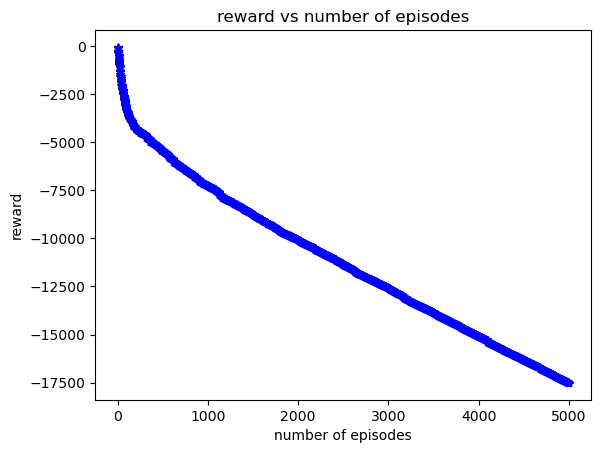

In [2]:
grid = np.array([[1, 2, 3, 4, 5, 6],
                 [7, 8, 9, 10, 11, 12],
                 [13, 14, 15, 16, 17, 18],
                 [19, 20, 21, 22, 23, 24],
                 [25, 26, 27, 28, 29, 30],
                 [31, 32, 33, 34, 35, 36]])

# initialize Q-table
Q = np.zeros((36,4))

# set initial state
state = (2, 4)  # (3,5) converted to 0-based indexing

# set hyperparameters
alpha = 0.05
gamma = 0.9
epsilon = 0.1
numepisode  = 5000
totalRewards = np.zeros(numepisode)

# possible actions
actions = ['left', 'right', 'up', 'down']

# define reward function
def get_reward(state):
    if state == 34:
        return 5
    elif state in range(1,7) or state in range(31,37) or state in [11,14,23,29]:
        return -5
    else:
        return -1


# define state transition function
def next_state(state, action):
    x, y = state
    if action == 'left':
        y = max(0, y-1)
    elif action == 'right':
        y = min(5, y+1)
    elif action == 'up':
        x = max(0, x-1)
    elif action == 'down':
        x = min(5, x+1)
    return x, y
epRewards = 0
# Q-learning algorithm
for i in range(numepisode):
    state = (2, 4)  # (3,5) converted to 0-based indexing
    done = False
    while not done:
        # choose an action based on epsilon-greedy policy
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(actions)
        else:
            action = actions[np.argmax(Q[grid[state] - 1])]

        # take the action and get the next state and reward
        next_state_ = next_state(state, action)
        reward = get_reward(next_state_)

        # update Q-table
        Q[grid[state]-1][actions.index(action)] = (1 - alpha) * Q[grid[state]-1][actions.index(action)] + \
                                                   alpha * (reward + gamma * np.max(Q[grid[next_state_]-1]))
        #Q[state,action] = Q[state,action] + alpha*(reward + gamma*Q[next_state_,action] - Q[state,action])
        epRewards += reward
        state = next_state_
        if grid[state] == 24:
            done = True
        totalRewards[i] = epRewards  
# plotting optimal results
plt.plot(totalRewards, 'b*')
plt.xlabel('number of episodes')
plt.ylabel('reward')
plt.title('reward vs number of episodes')
# optimal policy
policy = np.argmax(Q, axis=1) + 1
print("Optimal policy:", policy.reshape(6, 6))
